In [1]:
from pathlib import Path
import os

# Project root (where notebook is)
ROOT = Path.cwd()

# Force Keras cache into project folder
KERAS_HOME = ROOT / "data" / "keras"
KERAS_HOME.mkdir(parents=True, exist_ok=True)
os.environ["KERAS_HOME"] = str(KERAS_HOME)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers


In [3]:
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

tgz_path = keras.utils.get_file(
    "flower_photos.tgz",
    origin=url,
    extract=True
)


In [4]:
data_root = Path(tgz_path)/'flower_photos'   # remove .tgz

In [5]:
class_names = sorted([p.name for p in data_root.iterdir() if p.is_dir()])
print("Classes:", class_names)


Classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


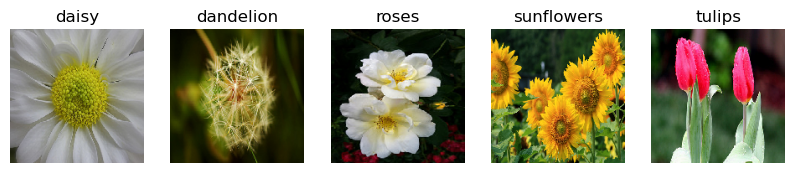

In [19]:
plt.figure(figsize=(10, 6))

for i, cls in enumerate(class_names):
    img_path = next((data_root / cls).glob("*"))
    img = keras.utils.load_img(img_path, target_size=(160, 160))

    plt.subplot(1, len(class_names), i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.show()


In [7]:
IMG_SIZE = (160, 160)

class_names = sorted(
    [p.name for p in data_root.iterdir() if p.is_dir()]
)

X = []
y = []

for label, cls in enumerate(class_names):
    for img_path in (data_root / cls).iterdir():
        img = keras.utils.load_img(
            img_path,
            target_size=IMG_SIZE
        )
        img = keras.utils.img_to_array(img) / 255.0

        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)


In [12]:
len(X)

3670

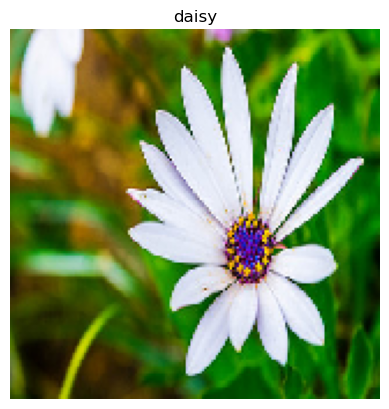

In [8]:
idx = 20
plt.imshow(X[idx])
plt.title(class_names[y[idx]])
plt.axis("off")
plt.show()


In [9]:
num_classes = len(class_names)

model = keras.Sequential([
    layers.Input(shape=(160, 160, 3)),
    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])


In [10]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [11]:
model.fit(
    X,y,
    epochs=5,
    batch_size=32,
    shuffle=True
)


Epoch 1/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 159ms/step - accuracy: 0.4362 - loss: 1.3776
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 18s 157ms/step - accuracy: 0.6398 - loss: 0.9339
Epoch 3/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 18s 158ms/step - accuracy: 0.7823 - loss: 0.6093
Epoch 4/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - accuracy: 0.8995 - loss: 0.3115
Epoch 5/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - accuracy: 0.9687 - loss: 0.1139


In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt

def show_random_predictions(model, X, y, class_names, num_samples=5):
    """
    Randomly selects images and compares
    true labels vs predicted labels.
    """

    indices = random.sample(range(len(X)), num_samples)

    preds = model.predict(X[indices], verbose=0)
    pred_labels = np.argmax(preds, axis=1)

    plt.figure(figsize=(15, 4))

    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[idx])
        plt.axis("off")

        true_name = class_names[y[idx]]
        pred_name = class_names[pred_labels[i]]

        plt.title(f"True: {true_name}\nPred: {pred_name}")

    plt.show()


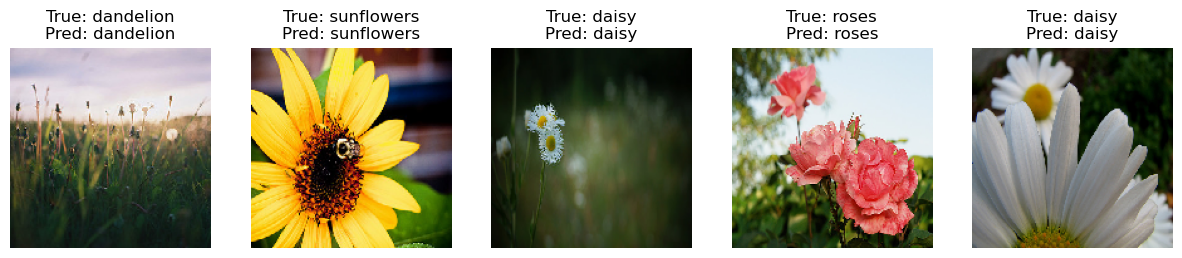

In [25]:
show_random_predictions(
    model=model,
    X=X,
    y=y,
    class_names=class_names,
    num_samples=5
)